# Assignment 05

#### Implement logistic regression using Python/R to perform classification on Social_Network_Ads.csv dataset.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/home/mayur/Desktop/ds/social_network_ads.csv")

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


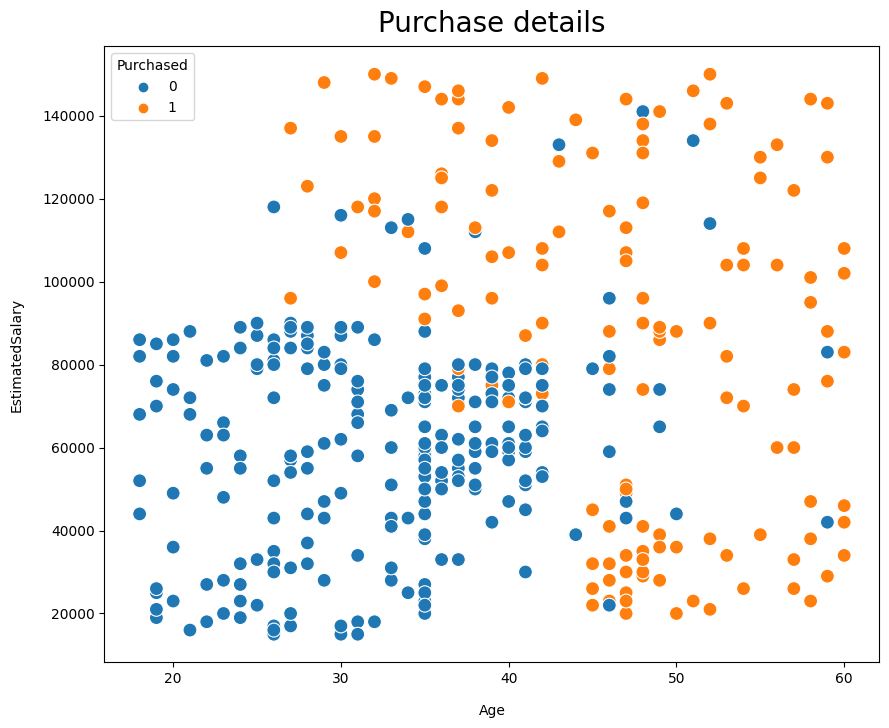

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=df,s=100)
plt.title("Purchase details",y=1.01, fontsize=20)
plt.xlabel("Age",labelpad=13)
plt.ylabel("EstimatedSalary", labelpad = 13)
ax=plt.gca()

## Training and Testing 

In [13]:
from sklearn.model_selection import train_test_split
x=df[['Age','EstimatedSalary']].values
y=df['Purchased'].values
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
x_train_scaled=scaler.transform(X_train)
x_test_scaled=scaler.transform(X_test)

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

## Prediction

In [17]:
logistic_regression.coef_

array([[-2.90796026e-09, -2.77065628e-06]])

In [18]:
logistic_regression.intercept_

array([-2.30352423e-10])

In [20]:
logistic_regression.predict_proba(X_test)


array([[0.51523393, 0.48476607],
       [0.5606543 , 0.4393457 ],
       [0.53043955, 0.46956045],
       [0.56610651, 0.43389349],
       [0.51938489, 0.48061511],
       [0.5428399 , 0.4571601 ],
       [0.57357699, 0.42642301],
       [0.55723911, 0.44276089],
       [0.5517637 , 0.4482363 ],
       [0.5449019 , 0.4550981 ],
       [0.5449019 , 0.4550981 ],
       [0.52353322, 0.47646678],
       [0.53319897, 0.46680103],
       [0.5159259 , 0.4840741 ],
       [0.5599717 , 0.4400283 ],
       [0.57425451, 0.42574549],
       [0.52629699, 0.47370301],
       [0.55107837, 0.44892163],
       [0.52905913, 0.47094087],
       [0.54146444, 0.45853556],
       [0.51869323, 0.48130677],
       [0.55518739, 0.44481261],
       [0.51592592, 0.48407408],
       [0.55244886, 0.44755114],
       [0.51315759, 0.48684241],
       [0.51592592, 0.48407408],
       [0.5551874 , 0.4448126 ],
       [0.5366454 , 0.4633546 ],
       [0.58572786, 0.41427214],
       [0.51454186, 0.48545814],
       [0.

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [22]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:-")
print(cm)

Confusion Matrix:-
[[63  0]
 [37  0]]


In [23]:
TP=cm[1,1]#True Positive
FP=cm[0,1]#False Positive
TN=cm[0,0]#True Negative
FN=cm[1,0]#False Negative

In [26]:
accuracy=accuracy_score(y_test,y_pred)
error_rate=1-accuracy
precision=precision_score(y_test,y_pred,average='macro')
recall=recall_score(y_test,y_pred,average='macro')

/home/mayur/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
print("TP:",TP)
print("FP:",FP)
print("TN:",TN)
print("FN:",FN)

TP: 0
FP: 0
TN: 63
FN: 37
